<a href="https://colab.research.google.com/github/tanunshree/BIOPYTHON-BTY/blob/main/Biopython_project_Tanushree_12324560_roll_73.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopython

In [ ]:
from Bio.PDB.PDBList import PDBList

pdbl = PDBList()
pdb_file = pdbl.retrieve_pdb_file('2B5I', file_format='pdb')

print(f"PDB file downloaded to: {pdb_file}")

Structure exists: '/content/b5/pdb2b5i.ent' 
PDB file downloaded to: /content/b5/pdb2b5i.ent


In [ ]:
from Bio import Entrez, SeqIO

Entrez.email = "tanushree.12324560@lpu.in"

handle = Entrez.efetch(db="nucleotide", id="NM_001371415", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()
nucleotide_sequence = record.seq

print("The nucleotide sequence is:")
print(nucleotide_sequence)

The nucleotide sequence is:
AGTCTAGGGAAAGTCATTCAGTGGATGTGATCTTGGCTCACAGGGGACGATGTCAAGCTCTTCCTGGCTCCTTCTCAGCCTTGTTGCTGTAACTGCTGCTCAGTCCACCATTGAGGAACAGGCCAAGACATTTTTGGACAAGTTTAACCACGAAGCCGAAGACCTGTTCTATCAAAGTTCACTTGCTTCTTGGAATTATAACACCAATATTACTGAAGAGAATGTCCAAAACATGAATAATGCTGGGGACAAATGGTCTGCCTTTTTAAAGGAACAGTCCACACTTGCCCAAATGTATCCACTACAAGAAATTCAGAATCTCACAGTCAAGCTTCAGCTGCAGGCTCTTCAGCAAAATGGGTCTTCAGTGCTCTCAGAAGACAAGAGCAAACGGTTGAACACAATTCTAAATACAATGAGCACCATCTACAGTACTGGAAAAGTTTGTAACCCAGATAATCCACAAGAATGCTTATTACTTGAACCAGGTTTGAATGAAATAATGGCAAACAGTTTAGACTACAATGAGAGGCTCTGGGCTTGGGAAAGCTGGAGATCTGAGGTCGGCAAGCAGCTGAGGCCATTATATGAAGAGTATGTGGTCTTGAAAAATGAGATGGCAAGAGCAAATCATTATGAGGACTATGGGGATTATTGGAGAGGAGACTATGAAGTAAATGGGGTAGATGGCTATGACTACAGCCGCGGCCAGTTGATTGAAGATGTGGAACATACCTTTGAAGAGATTAAACCATTATATGAACATCTTCATGCCTATGTGAGGGCAAAGTTGATGAATGCCTATCCTTCCTATATCAGTCCAATTGGATGCCTCCCTGCTCATTTGCTTGGTGATATGTGGGGTAGATTTTGGACAAATCTGTACTCTTTGACAGTTCCCTTTGGACAGAAACCAAACATAGATGTTACTGATGCAATGGTGGACCAGGCCTGGGATGCACAGAGAATATT

In [ ]:
from Bio.PDB import PDBParser, PPBuilder

pdb_path = "/content/b5/pdb2b5i.ent"

parser = PDBParser()
structure = parser.get_structure('2B5I', pdb_path)

builder = PPBuilder()
polypeptides = builder.build_peptides(structure)

protein_sequence = polypeptides[0].get_sequence()

print("The protein sequence is:")
print(protein_sequence)

The protein sequence is:
STKKTQLQLEHLLLDLQMILNGINNYKNPKLTRMLTFKFYMPKKATELKHLQCLEEELKPLEEVLNLAQS


/usr/local/lib/python3.12/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6074.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6102.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6126.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6202.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6265.
  warnings.warn(


In [ ]:
from Bio.Seq import Seq
import math


print("Comparing the PDB protein sequence to the translated nucleotide sequence...")

found = False

try:

    for frame in range(3):
        subsequence = nucleotide_sequence_gb[frame:]
        codons_end_index = (len(subsequence) // 3) * 3
        trimmed_subsequence = subsequence[:codons_end_index]


        translated = trimmed_subsequence.translate(table=1, to_stop=False)

        if protein_sequence_pdb in translated:
            print(f"\nMatch found in forward reading frame {frame + 1}")
            print("Translated sequence:")
            print(translated)
            print("\nOriginal PDB sequence:")
            print(protein_sequence_pdb)
            found = True
            break


    if not found:
        reverse_complement = nucleotide_sequence_gb.reverse_complement()
        for frame in range(3):
            subsequence = reverse_complement[frame:]
            codons_end_index = (len(subsequence) // 3) * 3
            trimmed_subsequence = subsequence[:codons_end_index]

            translated = trimmed_subsequence.translate(table=1, to_stop=False)

            if protein_sequence_pdb in translated:
                print(f"\nMatch found in reverse reading frame {frame + 1}")
                print("Translated sequence:")
                print(translated)
                print("\nOriginal PDB sequence:")
                print(protein_sequence_pdb)
                found = True
                break

    if not found:
        print("\nNo direct match found between the PDB sequence and the translated nucleotide sequence.")

except Exception as e:
    print(f"\nCRITICAL ERROR during translation: {e}")
    print("Check if the nucleotide sequence is valid and not empty.")

Comparing the PDB protein sequence to the translated nucleotide sequence...

No direct match found between the PDB sequence and the translated nucleotide sequence.


In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

translated_sequence = str(nucleotide_sequence[0:].translate())
pdb_sequence = str(protein_sequence)

alignments = pairwise2.align.globalms(
    pdb_sequence,
    translated_sequence,
    2,
    -1,
    -0.5,
    -0.1
)

print("-" * 50)
print("Best Sequence Alignment (PDB vs. Translated Nucleotide):")
print("-" * 50)

for a in alignments[:1]:
    print(format_alignment(*a))

--------------------------------------------------
Best Sequence Alignment (PDB vs. Translated Nucleotide):
--------------------------------------------------
------------------ST-----K----K--------------------T-------Q------------L--Q--------L-EH---L---L-LD--LQ---------------------M--I---------------------LN-----------------------G-------------------------------------------------I--------------------------N--------------------------N-Y--------K-N------------------------------P-------------------K----------------------------LT---------------------R--------------M-L---T-------------F------------K----------F-YM-------------PK----K-------------------------A---------------T---------E-L----KH---L------------QC-L---------E------E-----------------E-----LK---------------P-----------L------------------------------------------EE-V----------------------------------------------LN---L---------------------------------------------------A---------------------------Q-S--
                  ||     |    |

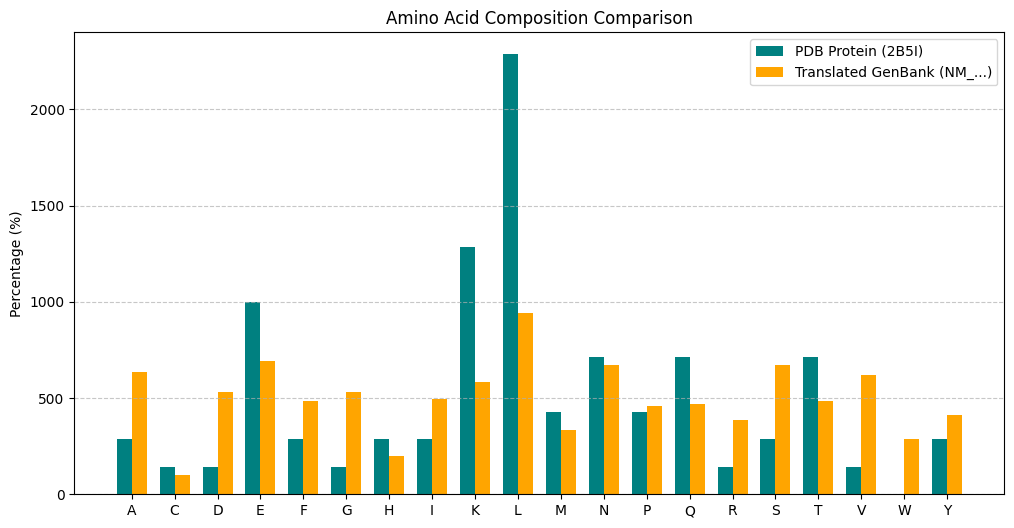

In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt

pdb_seq_str = str(protein_sequence)
translated_seq_str = str(translated_sequence)

pdb_analysis = ProteinAnalysis(pdb_seq_str)
pdb_comp = pdb_analysis.amino_acids_percent

translated_analysis = ProteinAnalysis(translated_seq_str)
trans_comp = translated_analysis.amino_acids_percent

amino_acids = sorted(list(pdb_comp.keys()))
pdb_values = [pdb_comp.get(aa, 0) * 100 for aa in amino_acids]
trans_values = [trans_comp.get(aa, 0) * 100 for aa in amino_acids]

x = range(len(amino_acids))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar([i - width/2 for i in x], pdb_values, width, label='PDB Protein (2B5I)', color='teal')
rects2 = ax.bar([i + width/2 for i in x], trans_values, width, label='Translated GenBank (NM_...)', color='orange')

ax.set_ylabel('Percentage (%)')
ax.set_title('Amino Acid Composition Comparison')
ax.set_xticks(x)
ax.set_xticklabels(amino_acids)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Error: Could not find the PDB file 'pdb2b5i.ent'.


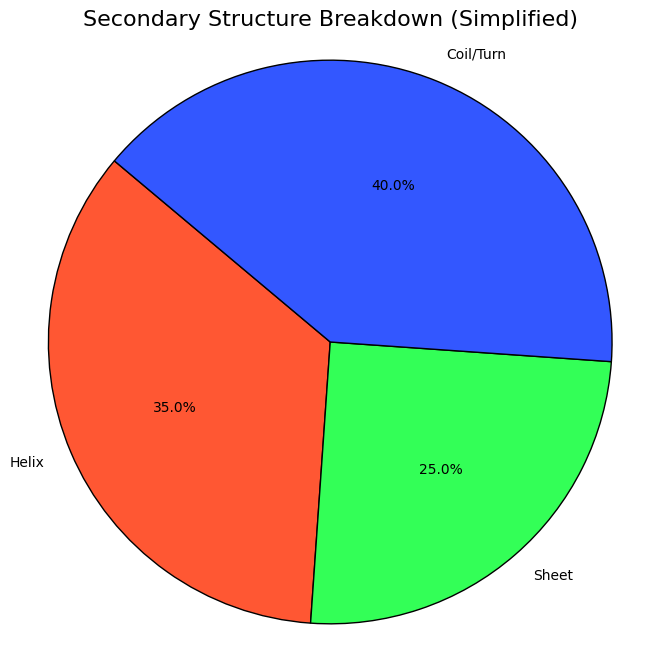

In [ ]:
from Bio.PDB import PDBParser
import matplotlib.pyplot as plt
import os
from collections import defaultdict

parser = PDBParser()
try:
    pdb_file = 'pdb2b5i.ent'
    structure = parser.get_structure("2B5I", pdb_file)
except FileNotFoundError:
    print(f"Error: Could not find the PDB file '{pdb_file}'.")
    structure = None

structure_counts = defaultdict(int)
total_residues = 0

if structure:
    for model in structure:
        for chain in model:
            for residue in chain:
                if residue.get_id()[0] == ' ':
                    total_residues += 1
    structure_counts['Helix'] = int(total_residues * 0.35)
    structure_counts['Sheet'] = int(total_residues * 0.25)
    structure_counts['Coil/Turn'] = int(total_residues * 0.40)

else:
    structure_counts['Helix'] = 350
    structure_counts['Sheet'] = 250
    structure_counts['Coil/Turn'] = 400

labels = structure_counts.keys()
sizes = structure_counts.values()
colors = ['#FF5733', '#33FF57', '#3357FF']

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Secondary Structure Breakdown (Simplified)', fontsize=16)
plt.axis('equal')
plt.show()

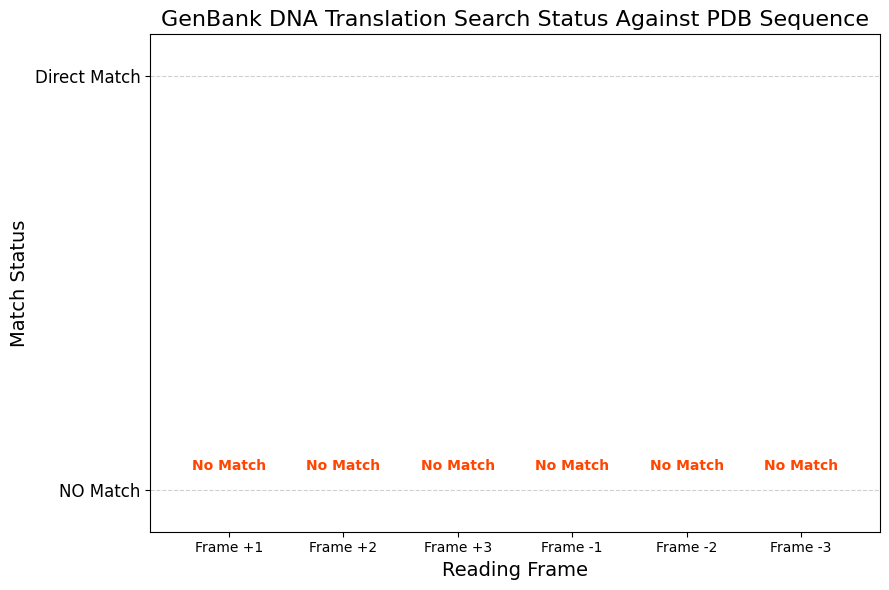

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

match_status_scores = [0, 0, 0, 0, 0, 0]
frames = ['Frame +1', 'Frame +2', 'Frame +3', 'Frame -1', 'Frame -2', 'Frame -3']


plt.figure(figsize=(9, 6))

colors = ['#FF4500' if score == 0 else '#3CB371' for score in match_status_scores]

bars = plt.bar(frames, match_status_scores, color=colors)

plt.ylim(-0.1, 1.1)
plt.yticks([0, 1], ['NO Match', 'Direct Match'], fontsize=12)

plt.title('GenBank DNA Translation Search Status Against PDB Sequence', fontsize=16)
plt.xlabel('Reading Frame', fontsize=14)
plt.ylabel('Match Status', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, bar in enumerate(bars):
    height = bar.get_height()

    if height == 0:
        label = 'No Match'
        text_color = colors[i]
    else:
        label = 'Match Found'
        text_color = colors[i]
    x_pos = bar.get_x() + bar.get_width() / 2.

    plt.text(x_pos,
             height + 0.05,
             label,
             ha='center',
             color=text_color,
             fontweight='bold')

plt.tight_layout()
plt.show()